### USE OF 'MATHAPLOT' PACKAGE FOR PLOTTING GRAPHS AND GRAPHICAL SOLUTION OF ODE, SPECIAL FUNCTION ETC.

#### PLOTTING OF GRAPH

In [1]:
import numpy as np 
from matplotlib import pyplot as plt 
%matplotlib inline

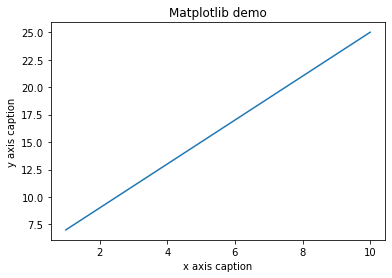

In [2]:
x = np.arange(1,11) 
y = 2 * x + 5 
plt.title("Matplotlib demo") 
plt.xlabel("x axis caption") 
plt.ylabel("y axis caption") 
plt.plot(x,y) 
plt.show()

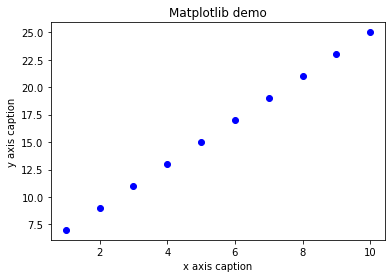

In [3]:
x = np.arange(1,11) 
y = 2 * x + 5 
plt.title("Matplotlib demo") 
plt.xlabel("x axis caption") 
plt.ylabel("y axis caption") 
plt.plot(x,y,"ob") 
plt.show() 

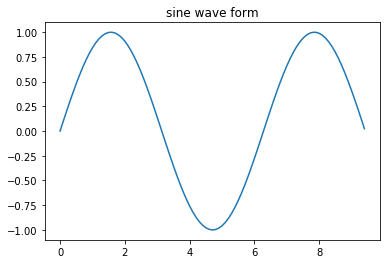

In [4]:
# Compute the x and y coordinates for points on a sine curve 
x = np.arange(0, 3 * np.pi, 0.1) 
y = np.sin(x) 
plt.title("sine wave form") 

# Plot the points using matplotlib 
plt.plot(x, y) 
plt.show() 

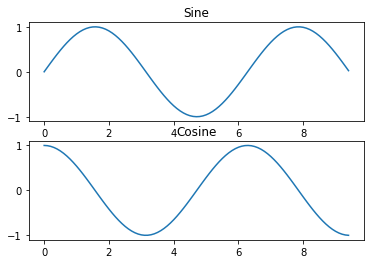

In [5]:
# Compute the x and y coordinates for points on sine and cosine curves 
x = np.arange(0, 3 * np.pi, 0.1) 
y_sin = np.sin(x) 
y_cos = np.cos(x)  
   
# Set up a subplot grid that has height 2 and width 1, 
# and set the first such subplot as active. 
plt.subplot(2, 1, 1)
   
# Make the first plot 
plt.plot(x, y_sin) 
plt.title('Sine')  
   
# Set the second subplot as active, and make the second plot. 
plt.subplot(2, 1, 2) 
plt.plot(x, y_cos) 
plt.title('Cosine')  
   
# Show the figure. 
plt.show()

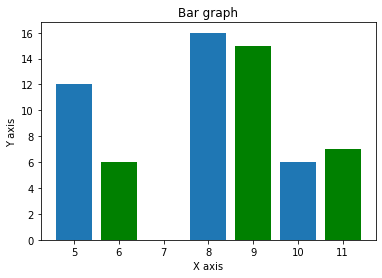

In [6]:
x = [5,8,10] 
y = [12,16,6]  

x2 = [6,9,11] 
y2 = [6,15,7] 
plt.bar(x, y, align = 'center') 
plt.bar(x2, y2, color = 'g', align = 'center') 
plt.title('Bar graph') 
plt.ylabel('Y axis') 
plt.xlabel('X axis')  

plt.show()

### NUMERICAL SOLUTION OF FIRST ORDER Ordinary Differential Equation (ODE) USING NUMPY (Acknowledgement: Adopted from link: https://apmonitor.com/pdc/index.php/Main/SolveDifferentialEquations) 

#### Problem I: Damping equation:
$$ \frac{dy(t)}{dt}+k y(t)=0, \quad (Boundary \quad condition \quad y(0)=5 \quad and \quad k=0.3)$$

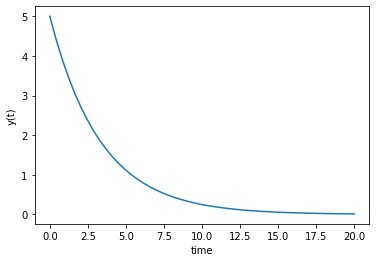

In [7]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline
########################################
# function that returns dy/dt
def model(y,t):
    k = 0.3
    dydt = -k * y
    return dydt
########################################
# initial condition
y0 = 5
# time points
t = np.linspace(0,20)
########################################
# solve ODE
y = odeint(model,y0,t)
########################################
# plot results
plt.plot(t,y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()

#### Problem II: 1st order ODE with different values of k

$$ \frac{dy(t)}{dt}+k y(t)=0, \quad (Boundary \quad condition \quad y(0)=5 \quad and \quad k=.1, .2, .3)$$

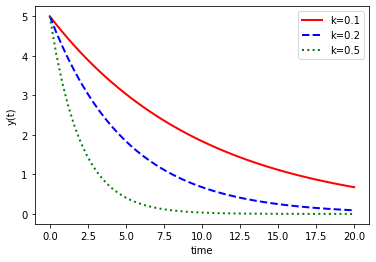

In [8]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline
# function that returns dy/dt
def model(y,t,k):
    dydt = -k * y
    return dydt

# initial condition
y0 = 5

# time points
t = np.linspace(0,20)

# solve ODEs
k = 0.1
y1 = odeint(model,y0,t,args=(k,))
k = 0.2
y2 = odeint(model,y0,t,args=(k,))
k = 0.5
y3 = odeint(model,y0,t,args=(k,))

# plot results
plt.plot(t,y1,'r-',linewidth=2,label='k=0.1')
plt.plot(t,y2,'b--',linewidth=2,label='k=0.2')
plt.plot(t,y3,'g:',linewidth=2,label='k=0.5')
plt.xlabel('time')
plt.ylabel('y(t)')
plt.legend()
plt.show()

### Problem III: 
$$\frac{dy(t)}{dt}+k y(t)=1.0 \quad (Boundary \quad condition \quad y(0)=0)$$

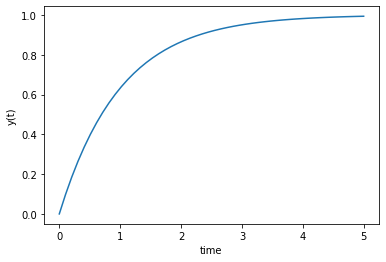

In [9]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline
# function that returns dy/dt
def model(y,t):
    dydt = -y + 1.0
    return dydt

# initial condition
y0 = 0

# time points
t = np.linspace(0,5)

# solve ODE
y = odeint(model,y0,t)

# plot results
plt.plot(t,y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()

### PROBLEM IV:
$$5\frac{dy(x)}{dt}+k y(x)=1.0+u(t) \quad (Boundary \quad condition 
\quad y(0)=1, \quad 0\leq u\leq2 \quad t=0) $$

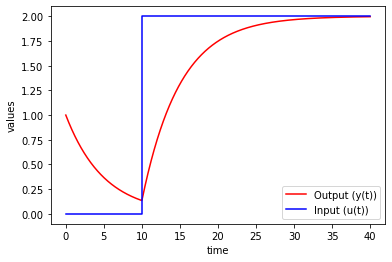

In [10]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline
# function that returns dy/dt
def model(y,t):
    # u steps from 0 to 2 at t=10
    if t<10.0:
        u = 0
    else:
        u = 2
    dydt = (-y + u)/5.0
    return dydt

# initial condition
y0 = 1

# time points
t = np.linspace(0,40,1000)

# solve ODE
y = odeint(model,y0,t)

# plot results
plt.plot(t,y,'r-',label='Output (y(t))')
plt.plot([0,10,10,40],[0,0,2,2],'b-',label='Input (u(t))')
plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()

#### PROBLEM V: 1st ODE WITH TWO VARIABLE

$$\frac{dx(t)}{dt}-3k\exp{-t}=0  \quad and \quad \frac{dy(t)}{dt}=3-y(t) \\ (Boundary \quad condition \quad x(0)=0, \quad y(0)=0)$$

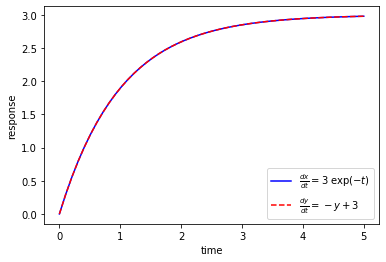

In [11]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline
# function that returns dz/dt
def model(z,t):
    dxdt = 3.0 * np.exp(-t)
    dydt = -z[1] + 3
    dzdt = [dxdt,dydt]
    return dzdt

# initial condition
z0 = [0,0]

# time points
t = np.linspace(0,5)

# solve ODE
z = odeint(model,z0,t)

# plot results
plt.plot(t,z[:,0],'b-',label=r'$\frac{dx}{dt}=3 \; \exp(-t)$')
plt.plot(t,z[:,1],'r--',label=r'$\frac{dy}{dt}=-y+3$')
plt.ylabel('response')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()

### PROBLEM VI: 
$$2\frac{dx(t)}{dt}+x(t)=u(t)  \quad and \quad 5\frac{dy(t)}{dt}+y(t)=x(t) \\ (Boundary \quad condition: \quad u(t)=2\Theta(t-5), \quad x(0)=0, \quad y(0)=0)$$

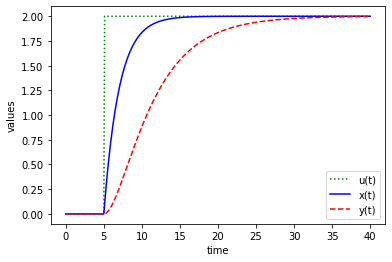

In [12]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

# function that returns dz/dt
def model(z,t,u):
    x = z[0]
    y = z[1]
    dxdt = (-x + u)/2.0
    dydt = (-y + x)/5.0
    dzdt = [dxdt,dydt]
    return dzdt

# initial condition
z0 = [0,0]

# number of time points
n = 401

# time points
t = np.linspace(0,40,n)

# step input
u = np.zeros(n)
# change to 2.0 at time = 5.0
u[51:] = 2.0

# store solution
x = np.empty_like(t)
y = np.empty_like(t)
# record initial conditions
x[0] = z0[0]
y[0] = z0[1]

# solve ODE
for i in range(1,n):
    # span for next time step
    tspan = [t[i-1],t[i]]
    # solve for next step
    z = odeint(model,z0,tspan,args=(u[i],))
    # store solution for plotting
    x[i] = z[1][0]
    y[i] = z[1][1]
    # next initial condition
    z0 = z[1]

# plot results
plt.plot(t,u,'g:',label='u(t)')
plt.plot(t,x,'b-',label='x(t)')
plt.plot(t,y,'r--',label='y(t)')
plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()

### NUMERICAL PLOTS OF "SPECIAL FUNCTION" USING 'NUMPY' & 'SCIPY'

### Plot of Bessel Function:

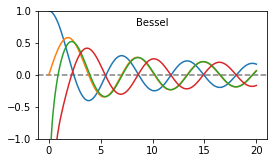

In [13]:
    import numpy as np
    import scipy.special 
    import matplotlib.pyplot as plt
    %matplotlib inline

    # create a figure window
    fig = plt.figure(1, figsize=(9,8))

    # create arrays for a few Bessel functions and plot them
    x = np.linspace(0, 20, 256)
    j0 = scipy.special.jn(0, x)
    j1 = scipy.special.jn(1, x)
    y0 = scipy.special.yn(0, x)
    y1 = scipy.special.yn(1, x)
    ax1 = fig.add_subplot(321)
    ax1.plot(x,j0, x,j1, x,y0, x,y1)
    ax1.axhline(color="grey", ls="--", zorder=-1)
    ax1.set_ylim(-1,1)
    ax1.text(0.5, 0.95,'Bessel', ha='center', va='top',
         transform = ax1.transAxes)
    plt.show()

### Plot of Gamma Function:

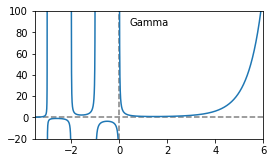

In [14]:
    import numpy as np
    import scipy.special
    import matplotlib.pyplot as plt
    %matplotlib inline

    # create a figure window
    fig = plt.figure(1, figsize=(9,8))

      # gamma function
    x = np.linspace(-3.5, 6., 3601)
    g = scipy.special.gamma(x)
    g = np.ma.masked_outside(g, -100, 400)
    ax2 = fig.add_subplot(322)
    ax2.plot(x,g)
    ax2.set_xlim(-3.5, 6)
    ax2.axhline(color="grey", ls="--", zorder=-1)
    ax2.axvline(color="grey", ls="--", zorder=-1)
    ax2.set_ylim(-20, 100)
    ax2.text(0.5, 0.95,'Gamma', ha='center', va='top',
         transform = ax2.transAxes)
    plt.show()

### Plot of Error Function:

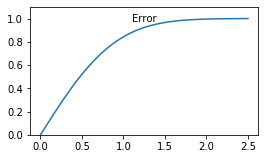

In [15]:
    import numpy as np
    import scipy.special
    import matplotlib.pyplot as plt
    %matplotlib inline

    # create a figure window
    fig = plt.figure(1, figsize=(9,8))

      # error function
    x = np.linspace(0, 2.5, 256)
    ef = scipy.special.erf(x)
    ax3 = fig.add_subplot(323)
    ax3.plot(x,ef)
    ax3.set_ylim(0,1.1)
    ax3.text(0.5, 0.95,'Error', ha='center', va='top',
         transform = ax3.transAxes)

    plt.show()

### Plot of Airy Function:

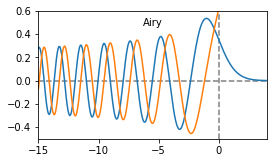

In [16]:
    import numpy as np
    import scipy.special
    import matplotlib.pyplot as plt
    %matplotlib inline

    # create a figure window
    fig = plt.figure(1, figsize=(9,8))

    # Airy function
    x = np.linspace(-15, 4, 256)
    ai, aip, bi, bip = scipy.special.airy(x)
    ax4 = fig.add_subplot(324)
    ax4.plot(x,ai, x,bi)
    ax4.axhline(color="grey", ls="--", zorder=-1)
    ax4.axvline(color="grey", ls="--", zorder=-1)
    ax4.set_xlim(-15,4)
    ax4.set_ylim(-0.5,0.6)
    ax4.text(0.5, 0.95,'Airy', ha='center', va='top',
         transform = ax4.transAxes)

    plt.show()

### Plot of Laguerre Function:

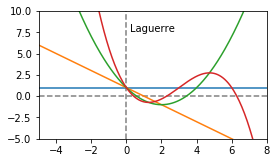

In [17]:
    import numpy as np
    import scipy.special
    import matplotlib.pyplot as plt
    %matplotlib inline

    # create a figure window
    fig = plt.figure(1, figsize=(9,8))

    # Laguerre polynomials
    x = np.linspace(-5, 8, 256)
    lg0 = np.polyval(scipy.special.laguerre(0),x)
    lg1 = np.polyval(scipy.special.laguerre(1),x)
    lg2 = np.polyval(scipy.special.laguerre(2),x)
    lg3 = np.polyval(scipy.special.laguerre(3),x)
    ax6 = fig.add_subplot(326)
    ax6.plot(x,lg0, x,lg1, x,lg2, x,lg3)
    ax6.axhline(color="grey", ls="--", zorder=-1)
    ax6.axvline(color="grey", ls="--", zorder=-1)
    ax6.set_xlim(-5,8)
    ax6.set_ylim(-5,10)
    ax6.text(0.5, 0.9,'Laguerre', ha='center', va='top',
         transform = ax6.transAxes)

    plt.show()

### Plot of Lagendre Function:

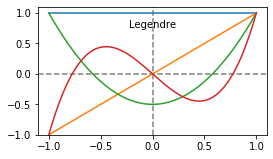

In [18]:
    import numpy as np
    import scipy.special
    import matplotlib.pyplot as plt
    %matplotlib inline

    # create a figure window
    fig = plt.figure(1, figsize=(9,8))

    # Legendre polynomials
    x = np.linspace(-1, 1, 256)
    lp0 = np.polyval(scipy.special.legendre(0),x)
    lp1 = np.polyval(scipy.special.legendre(1),x)
    lp2 = np.polyval(scipy.special.legendre(2),x)
    lp3 = np.polyval(scipy.special.legendre(3),x)
    ax5 = fig.add_subplot(325)
    ax5.plot(x,lp0, x,lp1, x,lp2, x,lp3)
    ax5.axhline(color="grey", ls="--", zorder=-1)
    ax5.axvline(color="grey", ls="--", zorder=-1)
    ax5.set_ylim(-1,1.1)
    ax5.text(0.5, 0.9,'Legendre', ha='center', va='top',
         transform = ax5.transAxes)
    plt.show()

### All Special Function plots combined in a single diagram:

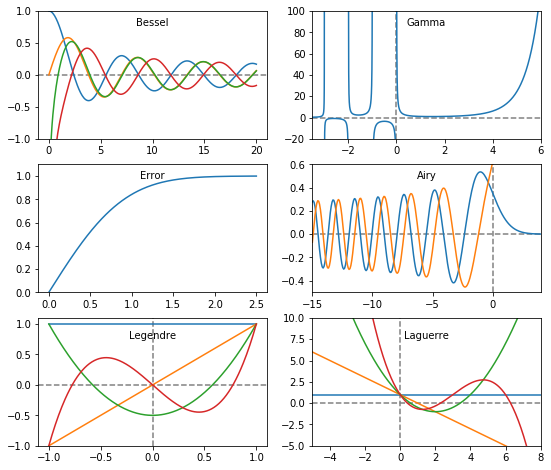

In [19]:
    import numpy as np
    import scipy.special
    import matplotlib.pyplot as plt
    %matplotlib inline

    # create a figure window
    fig = plt.figure(1, figsize=(9,8))

    # create arrays for a few Bessel functions and plot them
    x = np.linspace(0, 20, 256)
    j0 = scipy.special.jn(0, x)
    j1 = scipy.special.jn(1, x)
    y0 = scipy.special.yn(0, x)
    y1 = scipy.special.yn(1, x)
    ax1 = fig.add_subplot(321)
    ax1.plot(x,j0, x,j1, x,y0, x,y1)
    ax1.axhline(color="grey", ls="--", zorder=-1)
    ax1.set_ylim(-1,1)
    ax1.text(0.5, 0.95,'Bessel', ha='center', va='top',
         transform = ax1.transAxes)

    # gamma function
    x = np.linspace(-3.5, 6., 3601)
    g = scipy.special.gamma(x)
    g = np.ma.masked_outside(g, -100, 400)
    ax2 = fig.add_subplot(322)
    ax2.plot(x,g)
    ax2.set_xlim(-3.5, 6)
    ax2.axhline(color="grey", ls="--", zorder=-1)
    ax2.axvline(color="grey", ls="--", zorder=-1)
    ax2.set_ylim(-20, 100)
    ax2.text(0.5, 0.95,'Gamma', ha='center', va='top',
         transform = ax2.transAxes)

    # error function
    x = np.linspace(0, 2.5, 256)
    ef = scipy.special.erf(x)
    ax3 = fig.add_subplot(323)
    ax3.plot(x,ef)
    ax3.set_ylim(0,1.1)
    ax3.text(0.5, 0.95,'Error', ha='center', va='top',
         transform = ax3.transAxes)

    # Airy function
    x = np.linspace(-15, 4, 256)
    ai, aip, bi, bip = scipy.special.airy(x)
    ax4 = fig.add_subplot(324)
    ax4.plot(x,ai, x,bi)
    ax4.axhline(color="grey", ls="--", zorder=-1)
    ax4.axvline(color="grey", ls="--", zorder=-1)
    ax4.set_xlim(-15,4)
    ax4.set_ylim(-0.5,0.6)
    ax4.text(0.5, 0.95,'Airy', ha='center', va='top',
         transform = ax4.transAxes)

    # Legendre polynomials
    x = np.linspace(-1, 1, 256)
    lp0 = np.polyval(scipy.special.legendre(0),x)
    lp1 = np.polyval(scipy.special.legendre(1),x)
    lp2 = np.polyval(scipy.special.legendre(2),x)
    lp3 = np.polyval(scipy.special.legendre(3),x)
    ax5 = fig.add_subplot(325)
    ax5.plot(x,lp0, x,lp1, x,lp2, x,lp3)
    ax5.axhline(color="grey", ls="--", zorder=-1)
    ax5.axvline(color="grey", ls="--", zorder=-1)
    ax5.set_ylim(-1,1.1)
    ax5.text(0.5, 0.9,'Legendre', ha='center', va='top',
         transform = ax5.transAxes)

    # Laguerre polynomials
    x = np.linspace(-5, 8, 256)
    lg0 = np.polyval(scipy.special.laguerre(0),x)
    lg1 = np.polyval(scipy.special.laguerre(1),x)
    lg2 = np.polyval(scipy.special.laguerre(2),x)
    lg3 = np.polyval(scipy.special.laguerre(3),x)
    ax6 = fig.add_subplot(326)
    ax6.plot(x,lg0, x,lg1, x,lg2, x,lg3)
    ax6.axhline(color="grey", ls="--", zorder=-1)
    ax6.axvline(color="grey", ls="--", zorder=-1)
    ax6.set_xlim(-5,8)
    ax6.set_ylim(-5,10)
    ax6.text(0.5, 0.9,'Laguerre', ha='center', va='top',
         transform = ax6.transAxes)

    plt.show()

In [1]:
quit()